In [1]:


import meep as mp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video

%matplotlib notebook



In [2]:

def simulation(fcen,df):


    resolution = 10  # pixels/um

    core = 1.444*2  # dielectric constant of waveguide

    w = 8.2 # width of waveguide


    dpml = 1  # PML thickness

    L = 50

    dwL = 5

    pad = 2

    sx = 2 * (pad + dpml + dwL) + L  # size of cell in x direction

    sy = 2 * (pad + dpml) + w 

    cell = mp.Vector3(sx, sy, 0)


    cavity = mp.Block(
        size=mp.Vector3(L, w, mp.inf), 
        material=mp.Medium(epsilon=core)
        )

    geometry = [cavity]
    pml_layers = [mp.PML(1.0)]

    src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0),size=mp.Vector3(y=9))]

    sym = [mp.Mirror(mp.Y, phase=1), mp.Mirror(mp.X, phase=1)]

    sim = mp.Simulation(
        cell_size=cell,
        geometry=geometry,
        boundary_layers=pml_layers,
        eps_averaging=False,
        sources=src,
        symmetries=sym,
        resolution=resolution,
        )
    return sim



<IPython.core.display.Javascript object>


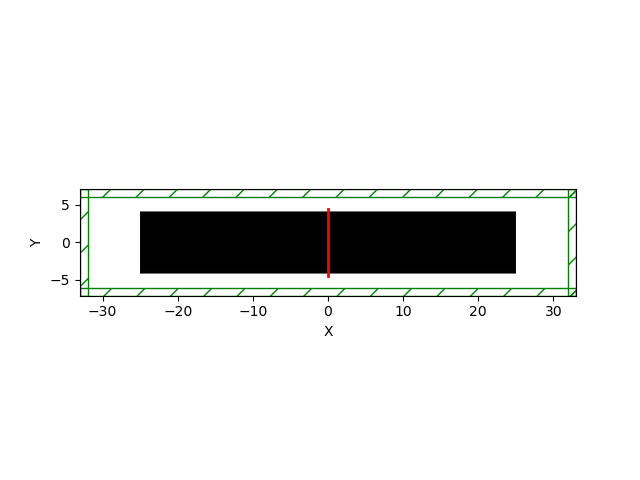

     block, center = (0,0,0)
          size (50,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.888,2.888,2.888)


/home/chriscrossing/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/chriscrossing/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [3]:
fcen=1/1.55

df=0.06
sim = simulation(fcen,df)

f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()



In [68]:
h = mp.Harminv(mp.Ez, mp.Vector3(), fcen, df)
sim.run(mp.after_sources(h), until_after_sources=400)

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00261497 s
Working in 2D dimensions.
Computational cell is 66 x 14.2 x 0 with resolution 10
     block, center = (0,0,0)
          size (50,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.888,2.888,2.888)
time for set_epsilon = 0.032707 s
-----------


FloatProgress(value=0.0, description='0% done ', max=566.6666717529297)

Meep progress: 411.15000000000003/566.6666717529297 = 72.6% done in 4.0s, 1.5s to go
on time step 8244 (time=412.2), 0.000485239 s/step
harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
harminv0:, 0.6191982203162213, -0.00119213324508706, 259.70176692413355, 0.002872146083606698, -0.0006150637778272035-0.0028055159373602248i, 4.541990763510494e-05+0.0i
harminv0:, 0.6258473813246479, -0.00424025197259278, 73.79837157907882, 0.02776346536821266, -0.011560781388804193+0.025241995621032468i, 0.00013209210233201888+0.0i
harminv0:, 0.6277875897945032, 0.0020779513861597767, -151.05925816549197, 0.0010569246387454817, 0.0010467919096026064+0.00014600133553428808i, 0.000196227189952893+0.0i
harminv0:, 0.6387236400490897, -0.0009293441457205844, 343.64214967634155, 0.05938930329268676, 0.035242870615404744-0.0478019813017889i, 2.300224797709262e-05+0.0i
harminv0:, 0.6450797535973031, 0.0014533409572085284, -221.9299436920588, 0.0022106754906900247, 0.0011441727577000285-0.0018915482

In [69]:
f = [m.freq for m in h.modes]
Q = [m.Q for m in h.modes]

for fiter, qiter in zip(f, Q):
    print(f"Resonant Wavelentgh (um): {1/fiter}, Q: {qiter}")


Resonant Wavelentgh (um): 1.614991721858156, Q: 259.70176692413355
Resonant Wavelentgh (um): 1.5978336409803826, Q: 73.79837157907882
Resonant Wavelentgh (um): 1.5928954574067558, Q: -151.05925816549197
Resonant Wavelentgh (um): 1.5656223400830196, Q: 343.64214967634155
Resonant Wavelentgh (um): 1.5501959167428143, Q: -221.9299436920588
Resonant Wavelentgh (um): 1.5268077935242748, Q: 180.64449151410057
Resonant Wavelentgh (um): 1.4985525200315124, Q: 155.14974564225892
Resonant Wavelentgh (um): 1.49108227919981, Q: -85.93510051323018


<IPython.core.display.Javascript object>


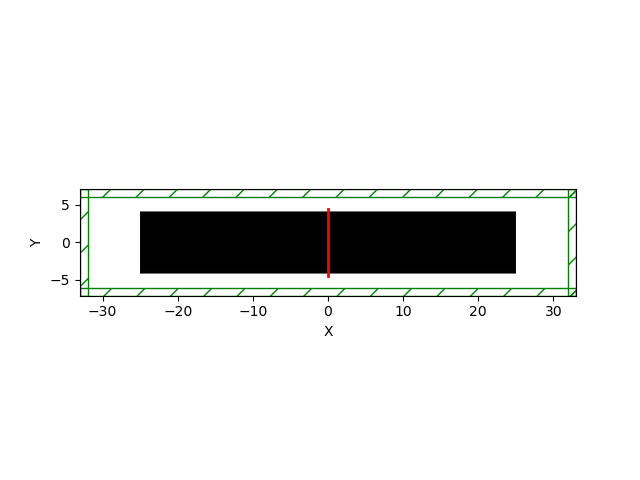

     block, center = (0,0,0)
          size (50,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.888,2.888,2.888)


In [4]:
fcen=1/1.55

df=0.06
sim = simulation(fcen,df)

f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

<IPython.core.display.Javascript object>


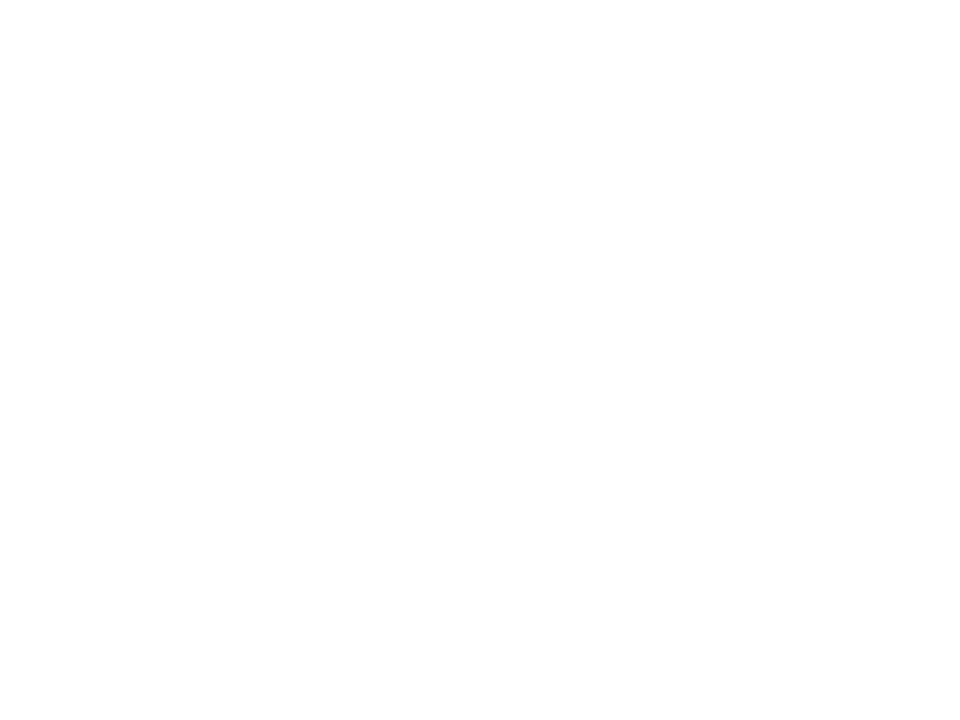

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00166512 s
Working in 2D dimensions.
Computational cell is 66 x 14.2 x 0 with resolution 10
     block, center = (0,0,0)
          size (50,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.888,2.888,2.888)
time for set_epsilon = 0.02373 s
-----------


FloatProgress(value=0.0, description='0% done ', max=500.0)

     block, center = (0,0,0)
          size (50,8.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.888,2.888,2.888)
Normalizing field data...
run 0 finished at t = 500.0 (10000 timesteps)


In [5]:




f = plt.figure(dpi=150)
animate = mp.Animate2D(sim, f=f, fields=mp.Ez, realtime=False, normalize=True)

sim.run(mp.at_every(10, animate), until=500)
plt.close()



In [6]:
filename = "hole-wvg-cavity-res.mp4"
animate.to_mp4(10, filename)
Video(filename,embed=True)

Generating MP4...
